# Dogrusal Olmayan Regresyon Modelleri

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


## Model

In [5]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [6]:
knn_model.n_neighbors

5

In [7]:
knn_model.metric

'minkowski'

In [8]:
dir(knn_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_algorithm_metric',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_pairwise',
 '_tree',
 '_y',
 'algorithm',
 'effective_metric_',
 'effective_metric_params_',
 'fit',
 'get_params',
 'kneighbors',
 'kneighbors_graph',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'n_samples_fit_',
 'p',
 'predict',
 'radius',
 'score',
 'set_params',
 'weights']

In [9]:
knn_model.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [10]:
y_pred = knn_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test,y_pred))

426.6570764525201

## Model Tuning

In [12]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [13]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k =", k, "icin RMSE degeri:", rmse)

k = 1 icin RMSE degeri: 455.03925390751965
k = 2 icin RMSE degeri: 415.99629571490965
k = 3 icin RMSE degeri: 420.6765370082348
k = 4 icin RMSE degeri: 428.8564674588792
k = 5 icin RMSE degeri: 426.6570764525201
k = 6 icin RMSE degeri: 423.5071669008732
k = 7 icin RMSE degeri: 414.9361222421057
k = 8 icin RMSE degeri: 413.7094731463598
k = 9 icin RMSE degeri: 417.84419990871265
k = 10 icin RMSE degeri: 421.6252180741266


In [14]:
#GridSearchCV

In [15]:
knn_params = {"n_neighbors": np.arange(1,30,1)}

In [16]:
knn = KNeighborsRegressor()

In [17]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train,y_train)

In [18]:
knn_cv_model.best_params_

{'n_neighbors': 8}

In [19]:
#final model

In [20]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [21]:
y_pred = knn_tuned.predict(X_test)

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

413.7094731463598

# Destek Vektor Regresyonu (SVR)

In [23]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model ve Tahmin

In [24]:
svr_model = SVR("linear").fit(X_train, y_train)

In [25]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
svr_model.predict(X_train)[0:5]

array([219.32622169, 702.4303869 , 623.2055964 , 153.77538476,
       463.15190834])

In [27]:
svr_model.predict(X_test)[0:5]

array([679.14754685, 633.72883069, 925.68640849, 270.28463621,
       530.26659184])

In [28]:
svr_model.intercept_

array([-80.15196151])

In [30]:
svr_model.coef_

array([[ -1.21839037,   6.09602969,  -3.67574533,   0.14217075,
          0.51435919,   1.28388986,  12.55922537,  -0.08693755,
          0.46597184,   2.98259944,   0.52944523,  -0.79820799,
         -0.16015534,   0.30872794,   0.28842348,  -1.79560067,
          6.41868985, -10.74313783,   1.33374317]])

In [31]:
#test
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.04084185624924

## Model Tuning

In [35]:
svr_model = SVR("linear")

In [36]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
svr_params = {"C": [0.1,0.5,1,3]}

In [38]:
svr_cv_model = GridSearchCV(svr_model,svr_params, cv = 5).fit(X_train, y_train)

In [39]:
svr_cv_model.best_params_

{'C': 0.5}

In [40]:
svr_cv_model = GridSearchCV(svr_model,svr_params, cv = 5, verbose = 2, n_jobs = -1).fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    7.3s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.6s finished


In [41]:
svr_cv_model.best_params_

{'C': 0.5}

In [44]:
svr_tuned = SVR("linear", C = 0.5).fit(X_train, y_train)

In [45]:
y_pred = svr_tuned.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.9874739022889

# Yapay Sinir Aglari (Neural Networks)

In [4]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model & Tahmin

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
mlp_model = MLPRegressor().fit(X_train_scaled,y_train)

In [8]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [9]:
mlp_model.predict(X_test_scaled)[0:5]

array([20.85677458, 41.63639475, 74.15500431, 16.48758538, 22.36825879])

In [11]:
y_pred = mlp_model.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test,y_pred))

654.7420110021394

## Model Tuning

In [12]:
mlp_params = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001],
              "hidden_layer_sizes":[(10,20), (5,5), (100,100)]}

In [23]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


In [24]:
mlp_cv_model.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': (100, 100)}

In [25]:
#Final
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,100)).fit(X_train_scaled,y_train)

In [27]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [28]:
np.sqrt(mean_squared_error(y_test,y_pred))

362.9992934535494

# Classification & Regression Tree (CART)

In [53]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [54]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

## Model & Tahmin

In [55]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [56]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

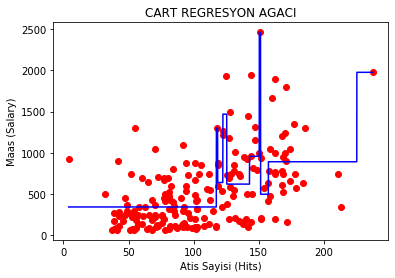

In [57]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X_train, y_train, color = 'red')

plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')

plt.title('CART REGRESYON AGACI')
plt.xlabel('Atis Sayisi (Hits)')
plt.ylabel('Maas (Salary)');

In [58]:
#tek degiskenli

In [59]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [60]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

In [61]:
#tum degiskenler

In [90]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [91]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [92]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

576.1125953135061

## Model Tuning

In [93]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [94]:
cart_model = DecisionTreeRegressor(max_depth = 3).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

435.3876314155003

In [95]:
?cart_model

Type:        DecisionTreeRegressor
String form:
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
           max_feat <...> raction_leaf=0.0, presort='deprecated',
           random_state=None, splitter='best')
File:        c:\users\efe\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error

In [96]:
cart_params = {"max_depth": [2,3,4,5,10,20],
              "min_samples_split": [2,10,5,30,50,10]}

In [97]:
cart_model = DecisionTreeRegressor()

In [98]:
cart_cv_model = GridSearchCV(cart_model,cart_params, cv = 10).fit(X_train, y_train)

In [99]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [104]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [105]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

361.0876906511434

# Random Forest

In [5]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model & Tahmin

In [6]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [7]:
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [8]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.73852779396566

## Model Tuning

In [9]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [12]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2, 10, 80, 100]}

In [13]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.6min finished


In [14]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [15]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                 max_features = 2,
                                 min_samples_split = 2, 
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [16]:
rf_tuned

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [18]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

348.2372919119422

## Degisken Onem Duzeyi

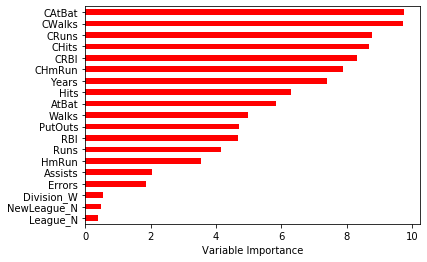

In [22]:
Importance = pd.DataFrame({'Importance': rf_tuned.feature_importances_*100}, index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# Gradient Boosting Machines (GBM)

In [9]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model & Tahmin

In [10]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [11]:
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
y_pred = gbm_model.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test,y_pred))

351.16056686575746

## Model Tuning

In [14]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)
gbm_model

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
?gbm_model

Type:        GradientBoostingRegressor
String form:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
           <...> =1.0, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)
Length:      100
File:        c:\users\efe\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

GB builds an additive model in a forward stage-wise fashion;
it allows for the optimization of arbitrary differentiable loss functions.
In each stage a regression tree is fit on the negative gradient of the
given loss function.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'ls', 'lad', 'huber', 'quantile'}, optional (default='ls')
    loss function to be optimized. 'ls' refers to least squares
    regression. 'lad' (least absolute deviation) is a highly robust
    loss function solely based on order information of the input
    variables. 'huber' is a combination of the two. 'qu

In [20]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
              "subsample": [1,0.5,0.8],
             "loss": ["ls","lad","quantile"]}

In [21]:
gbm_model = GradientBoostingRegressor().fit(X_train,y_train)

In [22]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 581 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1437 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 2020 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  1.7min finished


In [23]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [27]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     loss = "lad",
                                     max_depth = 3,
                                     n_estimators = 100,
                                     subsample = 0.5).fit(X_train,y_train)

In [28]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

347.17888044850844

## Degisken Onem Duzeyi

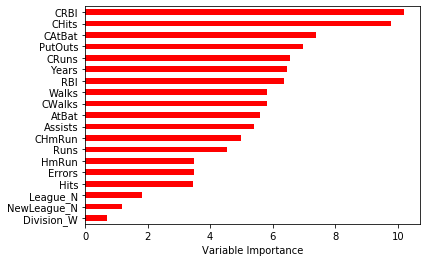

In [29]:
Importance = pd.DataFrame({'Importance': gbm_tuned.feature_importances_*100}, index = X_train.columns)

Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh', color = 'r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

# XGBoost

In [30]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Model & Tahmin

In [31]:
!pip install xgboost

In [13]:
import xgboost
from xgboost import XGBRegressor

In [35]:
xgb = XGBRegressor().fit(X_train,y_train)

In [36]:
xgb

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [37]:
y_pred = xgb.predict(X_test)

In [38]:
np.sqrt(mean_squared_error(y_test, y_pred))

355.4651481224188

## Model Tuning

In [40]:
xgb = XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=False, verbosity=None)

In [41]:
xgb_params = {"learning_rate": [0.1,0.01,0.5],
             "max_depth": [2,3,4,5,8],
             "n_estimators": [100,200,500,1000],
              "colsample_bytree": [0.4,0.7,1]}

In [42]:
xgb_cv_model = GridSearchCV(xgb,xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   22.9s finished


In [43]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [47]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4,
                         learning_rate = 0.1,
                         max_depth = 2,
                         n_estimators = 1000).fit(X_train,y_train)

In [48]:
y_pred = xgb_tuned.predict(X_test)

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.8515297956715

# Light GBM

In [50]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [51]:
!pip install lightgbm

In [52]:
#conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\EFE\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    lightgbm-2.3.1             |   py37h6538335_0         559 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following NEW packages will be INSTALLED:

  lightgbm           conda-forge/win-64::lightgbm-2.3.1-py37h6538335_0
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.2-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1




conda-4.



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [10]:
from lightgbm import LGBMRegressor

## Model & Tahmin

In [56]:
lgb_model = LGBMRegressor().fit(X_train, y_train)

In [57]:
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
y_pred = lgb_model.predict(X_test)

In [60]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [61]:
lgb_model = LGBMRegressor()
lgb_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [62]:
lgbm_params = {"learning_rate": [0.01,0.1,0.5,1],
               "n_estimators": [20,40,100,200,500,1000],
               "max_depth": [1,2,3,4,5,6,7,8,9,10]}

In [63]:
lgbm_cv_model = GridSearchCV(lgb_model,lgbm_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1192 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   13.0s finished


In [65]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 20}

In [66]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1,
                           max_depth = 6,
                           n_estimators = 20).fit(X_train,y_train)

In [69]:
y_pred = lgbm_tuned.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test, y_pred))

371.5044868943621

# CatBoost

In [71]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [72]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=c70f290f490c100043e1f2dd16476299b7a3d64ce5d095b2b8047c0926b9e4f3
  Stored in directory: c:\users\efe\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [6]:
from catboost import CatBoostRegressor

In [80]:
catb_model = CatBoostRegressor().fit(X_train,y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 1.13ms	remaining: 1.13s
1:	learn: 432.4168868	total: 2.05ms	remaining: 1.02s
2:	learn: 426.3836690	total: 2.79ms	remaining: 929ms
3:	learn: 420.2261014	total: 3.56ms	remaining: 887ms
4:	learn: 414.9976675	total: 4.28ms	remaining: 851ms
5:	learn: 409.6125323	total: 4.96ms	remaining: 823ms
6:	learn: 403.9277911	total: 5.7ms	remaining: 809ms
7:	learn: 398.4395285	total: 6.47ms	remaining: 802ms
8:	learn: 392.4517081	total: 7.3ms	remaining: 804ms
9:	learn: 387.4871123	total: 8.04ms	remaining: 796ms
10:	learn: 382.6230510	total: 8.78ms	remaining: 789ms
11:	learn: 378.1012454	total: 9.6ms	remaining: 790ms
12:	learn: 372.6002306	total: 10.5ms	remaining: 796ms
13:	learn: 368.4682192	total: 11.4ms	remaining: 800ms
14:	learn: 364.0565766	total: 12.1ms	remaining: 795ms
15:	learn: 359.5683249	total: 12.8ms	remaining: 784ms
16:	learn: 355.1782794	total: 13.5ms	remaining: 780ms
17:	learn: 350.4689946	total: 14.3ms	remaining: 779ms
18:	learn: 

In [81]:
y_pred = catb_model.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

## Model Tuning

In [83]:
catb_params = {"iterations": [200,500,100],
               "learning_rate": [0.01,0.1],
               "depth": [3,6,8]}

In [84]:
catb_model = CatBoostRegressor()

In [85]:
catb_cv_model = GridSearchCV(catb_model,
                             catb_params,
                             cv = 5,
                             n_jobs = -1,
                             verbose = 2).fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s


0:	learn: 425.7900818	total: 1.85ms	remaining: 367ms
1:	learn: 404.8723520	total: 2.13ms	remaining: 211ms
2:	learn: 387.4057666	total: 2.41ms	remaining: 159ms
3:	learn: 372.2801584	total: 2.7ms	remaining: 132ms
4:	learn: 358.9204229	total: 2.98ms	remaining: 116ms
5:	learn: 347.0083933	total: 3.25ms	remaining: 105ms
6:	learn: 336.0130818	total: 3.51ms	remaining: 96.8ms
7:	learn: 324.3923300	total: 3.79ms	remaining: 91ms
8:	learn: 314.8690957	total: 4.07ms	remaining: 86.3ms
9:	learn: 308.5075563	total: 4.33ms	remaining: 82.4ms
10:	learn: 298.8587285	total: 4.61ms	remaining: 79.3ms
11:	learn: 294.7655438	total: 4.87ms	remaining: 76.3ms
12:	learn: 288.0697862	total: 5.13ms	remaining: 73.8ms
13:	learn: 282.6697154	total: 5.4ms	remaining: 71.7ms
14:	learn: 277.6121667	total: 5.68ms	remaining: 70ms
15:	learn: 273.4383979	total: 6.01ms	remaining: 69.1ms
16:	learn: 269.1556201	total: 6.27ms	remaining: 67.5ms
17:	learn: 264.8098704	total: 6.54ms	remaining: 66.2ms
18:	learn: 261.6700768	total: 6.

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   23.6s finished


In [86]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [87]:
catb_tuned = CatBoostRegressor(depth = 3,
                           iterations = 200,
                           learning_rate = 0.1).fit(X_train,y_train)

0:	learn: 425.7900818	total: 758us	remaining: 151ms
1:	learn: 404.8723520	total: 1.18ms	remaining: 117ms
2:	learn: 387.4057666	total: 1.49ms	remaining: 97.8ms
3:	learn: 372.2801584	total: 1.81ms	remaining: 88.5ms
4:	learn: 358.9204229	total: 2.16ms	remaining: 84.4ms
5:	learn: 347.0083933	total: 2.52ms	remaining: 81.5ms
6:	learn: 336.0130818	total: 2.84ms	remaining: 78.3ms
7:	learn: 324.3923300	total: 3.16ms	remaining: 75.9ms
8:	learn: 314.8690957	total: 3.48ms	remaining: 73.8ms
9:	learn: 308.5075563	total: 3.8ms	remaining: 72.2ms
10:	learn: 298.8587285	total: 4.12ms	remaining: 70.8ms
11:	learn: 294.7655438	total: 4.43ms	remaining: 69.5ms
12:	learn: 288.0697862	total: 4.74ms	remaining: 68.1ms
13:	learn: 282.6697154	total: 5.03ms	remaining: 66.9ms
14:	learn: 277.6121667	total: 5.35ms	remaining: 66ms
15:	learn: 273.4383979	total: 5.67ms	remaining: 65.2ms
16:	learn: 269.1556201	total: 5.98ms	remaining: 64.4ms
17:	learn: 264.8098704	total: 6.29ms	remaining: 63.7ms
18:	learn: 261.6700768	tot

In [88]:
y_pred = catb_tuned.predict(X_test)

In [89]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.3125832615482

# Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi

In [7]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [22]:
def compML(df, y, alg):
    
    #train test ayrimi
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    
    #modelleme
    model = alg().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_ismi = alg.__name__
    print(model_ismi, "Modeli RMSE Degeri =", RMSE)
    return RMSE

In [23]:
compML(df, "Salary", SVR)

SVR Modeli RMSE Degeri= 460.0032657244849


460.0032657244849

In [24]:
models = [LGBMRegressor,
          XGBRegressor,
          GradientBoostingRegressor,
          RandomForestRegressor,
          DecisionTreeRegressor,
          MLPRegressor,
          KNeighborsRegressor,
          SVR]

In [26]:
for i in models:
    compML(df, "Salary", i)

LGBMRegressor Modeli RMSE Degeri= 363.8712087611089
XGBRegressor Modeli RMSE Degeri= 355.4651481224188
GradientBoostingRegressor Modeli RMSE Degeri= 353.41972063375573
RandomForestRegressor Modeli RMSE Degeri= 339.89578492236416
DecisionTreeRegressor Modeli RMSE Degeri= 477.7050962260592
MLPRegressor Modeli RMSE Degeri= 450.3877695431363
KNeighborsRegressor Modeli RMSE Degeri= 426.6570764525201
SVR Modeli RMSE Degeri= 460.0032657244849
